In [171]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
import sys
import time
sys.setrecursionlimit(3500)

In [172]:
G = nx.DiGraph()

G_dict = {}


In [173]:
def combiner(string1,string2):
    ol_letters ,max_ol = "" ,0
    
    if len(string1) < len(string2):
        shorter = string1
        longer = string2
    elif len(string1) > len(string2):
        shorter = string2
        longer = string1
    else:
        shorter = string1
        longer = string2
        
    for i in range(len(longer)):
        #shorter's suffix to longer's prefix
        if i <= len(shorter):
            #checks if suffix of shorter overlaps with prefix of longer and records the longest overlap
            #print(shorter[len(shorter)-i:],longer[:i],sep='_')
            if shorter[-i:] == longer[:i]:
                if len(longer[:i]) > len(ol_letters):
                    ol_letters  = longer[:i]
                    max_ol = len(ol_letters)
        #sees if anything in longer matches up with shorter
        if i + len(shorter) <= len(longer) + 1:
            #print(shorter,longer[i:len(shorter) - 1 + i],sep= '*')
            if shorter == longer[i:len(shorter) - 1 + i]:
                if len(longer[:i]) > len(ol_letters):
                    ol_letters = longer[i:len(shorter) - 1 + i]
                    max_ol = len(ol_letters)
        #shorter's prefix to longer's suffix
        if i <= len(shorter):
            #sees if anything in longer matches up with shorter
            # print(shorter[:i],longer[len(longer)-i:],sep='|')
            if shorter[:i] == longer[-i:]:
                if len(shorter[:i]) > len(ol_letters):
                    ol_letters =  longer[len(longer)-i:]
                    max_ol = len(ol_letters)

    
    
    marker = longer.find(ol_letters)
    if marker > len(shorter):
        
        #print("test1")
        return longer, max_ol
    elif max_ol > 0:
        if len(shorter) == len(longer):
            #print("test2")
            #shorter's prefix to longer's suffix
            if shorter[:max_ol] == longer[len(longer)-max_ol:]:
                return longer + shorter[max_ol:] , max_ol
            #shorter's suffix to longer's prefix
            elif shorter[len(shorter)-max_ol:] == longer[:max_ol]:
                return shorter + longer[max_ol:], max_ol
        #prefix of one equals suffix for one character then combined at that point
        elif max_ol == 1:
            #print("test3")
            #shorter's prefix to longer's suffix
            if shorter[:1] == longer[-1:]:
                return  longer + shorter[1:], max_ol
            #shorter's suffix to longer's prefix
            elif shorter[-1:] == longer[:1]:
                return shorter + longer[1:], max_ol
        #if shorter is part of a substring of longer,the overlapping region of substring longer is spliced and the remainder is added
        #to shorter or longer depending on the overlap
        else:
            #print("test4")
            
            #shorter's prefix to longer's suffix
            if shorter[:max_ol] == longer[len(longer) - max_ol:]:
                return longer + shorter[max_ol:], max_ol
            #shorter's suffix to longer's prefix
            if shorter[len(shorter) - max_ol:] == longer[:max_ol]:
                return shorter + longer[max_ol:], max_ol
    elif max_ol == 0:
        #print("test5")
        return shorter + longer, max_ol
    


In [174]:
def hamming_dist(s1,s2):
    return len([i for i in range(len(s1)) if s1[i] != s2[i]])

In [175]:

def greedy_graph(arr):
    
    #print(len(arr))
    
    G.add_node(arr[0])
    if len(arr) == 1:
        return arr[0]
    
    for j in range(1,len(arr)):
        string_overlap = combiner(arr[0],arr[j])
        #string = string_overlap[0]
        overlap = string_overlap[1]
       
        
        if overlap > 15:
            G.add_node(arr[j])
            #if arr[0] is a prefix
         
            if string_overlap[0].find(arr[0]) == 0:
                #print('prefix')
                G.add_edge(arr[j], arr[0], weight=overlap)
            elif string_overlap[0].find(arr[0]) > 0:
                #print('suffix')
                G.add_edge(arr[0], arr[j], weight=overlap)
         
            #G.add_edge(arr[0], arr[j], weight=overlap)
            
            
            
    
    arr.pop(0)
    return greedy_graph(arr)



In [176]:
def greedy_scs(arr):
    max_overlap, index_1,index_2,true_string = 0 ,0 ,0 ,""
    #print(len(arr))
    
    if len(arr) == 1:
        return arr[0]
    
    for j in range(1,len(arr)):
        string_overlap = combiner(arr[0],arr[j])
        string = string_overlap[0]
        overlap = string_overlap[1]
        #Making the overlap exceed a certain amount in order to
        #ensure biological relevant
        if overlap >= max_overlap and overlap > 15:
            max_overlap = overlap
            true_string = string
            index_1 = 0
            index_2 = j
    #print(arr)    
    #print(max_overlap)
    #removal from array has to be like this so the indexing doesn't mess up    
    if index_2 != 0:
        arr.pop(index_2)
        arr.pop(index_1)
        arr.append(true_string)
    else:
        arr.pop(index_1)
    
    
    
    
    
    return greedy_scs(arr)


In [177]:

def reader(file,limit = None):
    reads = []
    emp_string = ''
    the_count = 0
    
    with open(file,"r") as f:
        line = f.readline().strip("\n")
        while line != '':
            #print(emp_string)
            if '>' not in line and '@' not in line:
                emp_string += line
                
            else:
                reads.append(emp_string)
                emp_string = ''
                the_count += 1
            if the_count == limit and limit != None:
                return reads
            line = f.readline().strip("\n")
            
    return reads

In [178]:
def one_fasta(file):
    for seq_record in SeqIO.parse(file,"fasta"):
        return str(seq_record.seq)

DiGraph with 36 nodes and 77 edges


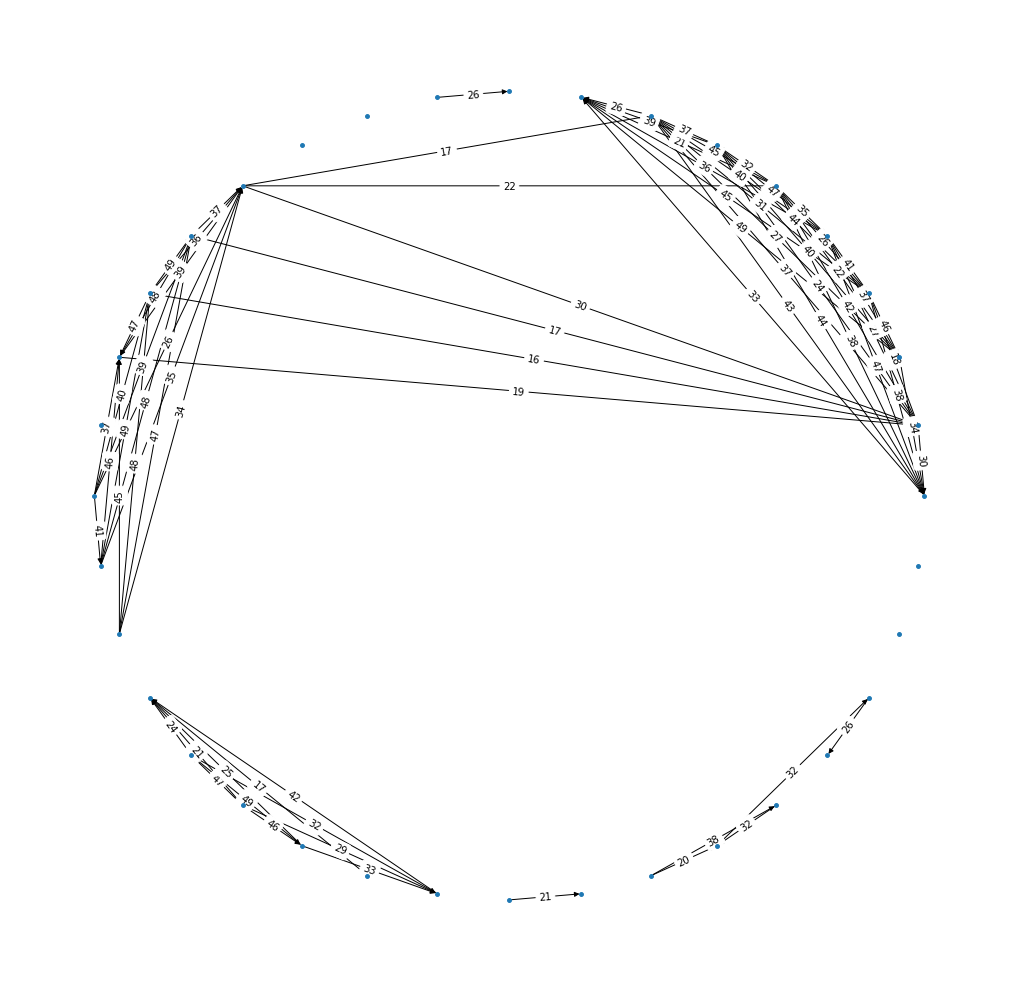

In [179]:
#string1 = "gctaagttcatgcatc"
#arr = ['ACC', 'AAC', 'GAA', 'TGA']

long_string = one_fasta("Mycoplasma genitalium.fasta")
reads = reader("Mycoplasma genitalium reads.fasta",200)
random_reads = random.choices(reads,k = 50)
#print([i for i in random_reads])
temp = random_reads.copy()
greedy_graph(temp)


print(G)
#print(list(nx.simple_cycles(G)))

pos=nx.circular_layout(G)
labels = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(18,18)) 
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G, pos , with_labels = False,node_size=15,font_size=10,font_color = 'red')
plt.savefig('graph.png')

In [180]:
#start = time.time()
recon = greedy_scs(random_reads)
#print(time.time() - start)
print(recon)
#print(len(recon))
#print(len(long_string))
print(recon in long_string)

ATTTAGTTTGTGGCAAAAGCTTCTGTACTGTTTATTTAATGGAAGAAAATAACAAAGCAAATATCTATGACTCTAGTAGCATTAAGGTCCTTGAAGGACTTGAGGCTGTTAGAAAACGCCCCG
False
